
# Módulo 2: HTML: Requests y BeautifulSoup
## Parsing Pagina12

<img src="https://www.pagina12.com.ar/assets/media/logos/logo_pagina_12_n.svg?v=1.0.178" data-canonical-src="https://gyazo.com/eb5c5741b6a9a16c692170a41a49c858.png" width="200"/>

En este módulo veremos cómo utilizar las bibliotecas requests y bs4 para programar scrapers de sitios HTML. Nos propondremos armar un scraper de noticias del diario Página 12.

Supongamos que queremos leer el diario por internet. Lo primero que hacemos es abrir el navegador, escribir la URL del diario y apretar Enter para que aparezca la página del diario. Lo que ocurre en el momento en el que apretamos Enter es lo siguiente:

1. El navegador envía una solicitud a la URL pidiéndole información.
2. El servidor recibe la petición y procesa la respuesta.
3. El servidor envía la respuesta a la IP de la cual recibió la solicitud.
4. Nuestro navegador recibe la respuesta y la muestra formateada en pantalla.

Para hacer un scraper debemos hacer un programa que replique este flujo de forma automática y sistemática para luego extraer la información deseada de la respuesta. Utilizaremos requests para realizar peticiones y recibir las respuestas y bs4 para parsear la respuesta y extraer la información.
Te dejo unos links que tal vez te sean de utilidad:

* [Códigos de status HTTP](https://developer.mozilla.org/es/docs/Web/HTTP/Status)
* [Documentación de requests](https://requests.kennethreitz.org/en/master/)
* [Documentación de bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)


In [0]:
import requests

In [0]:
url = 'https://www.pagina12.com.ar/'

In [0]:
# Usamos el método get para obtener la página web de página 12 y la guardamos en una variable
p12 = requests.get(url)

In [5]:
# Revisamos que la página haya sido obtenida de forma correcta
p12.status_code

200

In [6]:
# Podemos obtener la página web como un texto
p12.text

'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:description" content="Nota

In [7]:
# La b del inicio nos indica que se trata de bytes
p12.content

b'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3\xa1gina12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:desc

In [8]:
# Para obtener los encabezados de la respuesta
p12.headers

{'Date': 'Fri, 22 May 2020 19:01:33 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=da7b46e5bf07e44a511b19fe0734d460a1590174093; expires=Sun, 21-Jun-20 19:01:33 GMT; path=/; domain=.pagina12.com.ar; HttpOnly; SameSite=Lax', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-Backend': 'prod_frontend_1', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '0', 'grace': '86400.000 none', 'ttl': '119.679', 'x-debug': '', 'X-Instance': 'cache-front-prod-varnish-76c5f88cf6-l8x6d', 'x-restarts': '0', 'X-Cache': 'HIT (5)', 'CF-Cache-Status': 'DYNAMIC', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '5978c954df5e0ed2-DFW', 'Conten

In [9]:
# Podemos obtener información también del request y no solo del response
p12.request.headers

{'User-Agent': 'python-requests/2.23.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [10]:
p12.request.method

'GET'

In [11]:
# La url nos ayuda en ocasiones donde la página web nos redirecciona
p12.request.url

'https://www.pagina12.com.ar/'

Ahora vamos a extraer información de la página web

In [0]:
# BeautifulSoup Nos permite parsear el código html
from bs4 import BeautifulSoup

In [0]:
# Debe indicarsele el paerser (lxml) a la función
# Paser: Es el que se encarga de tomar el código html separandolo para que sea más fácil de identificar y manejar
soup = BeautifulSoup(p12.text, 'lxml')

In [14]:
type(soup)

bs4.BeautifulSoup

In [0]:
# Para imprimir la página pretiffy
print(soup.prettify())

In [16]:
# Find devuelve el primer elemento que encuentra
# Find all devuelve todos los elementos que coninciden con la busqueda
sections = soup.find('ul', attrs={'class': 'hot-sections'}).find_all('li')
sections

[<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class=""><a href="https://www.pagina12.com.ar/secciones/universidad-diario">Universidad</a></li>,
 <li class="no-border"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li>]

In [17]:
section = sections[0]
section

<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>

In [18]:
section.find('a')

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [19]:
section.a

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [20]:
section.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [21]:
section.a.get_text()

'El país'

In [22]:
links_sections = [section.a.get('href') for section in sections]
links_sections

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/universidad-diario',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/contratapa']

In [23]:
# Puedo hacer llamado a las páginas dentro de la web
new_section = requests.get(links_sections[0])
new_section

<Response [200]>

In [24]:
soup_section = BeautifulSoup(new_section.text, 'lxml')
soup_section.prettify()

'<!DOCTYPE html>\n<html class="no-js">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   El país | Página12\n  </title>\n  <link href="https://www.pagina12.com.ar/secciones/el-pais" rel="canonical"/>\n  <script type="application/ld+json">\n   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}\n  </script>\n  <meta content="La puja política de coyuntura y la reflexión de prestigiosos columnistas sobre la actualidad.\n" name="description" property="description"/>\n  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>\n  <meta content="es_AR" name="og:locale" property="og:locale"/>\n  <meta content="El país | Página12" name="og:title" property="og:title"/>\n  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>\n  <meta content="website" name="og:type" property="og:type"/>\n  <meta content="https://www.pagina12.com.ar/secciones/el-pais" 

In [25]:
featured_article =  soup_section.find('div', attrs={'class':'featured-article__container'})
featured_article

<div class="featured-article__container"><span class="title-prefix"><a href="https://www.pagina12.com.ar/267533-alberto-fernandez-recibe-a-los-especialistas-y-define-como-s">El Presidente hará el anuncio este sábado</a></span><h2><a href="https://www.pagina12.com.ar/267533-alberto-fernandez-recibe-a-los-especialistas-y-define-como-s">Alberto Fernández recibe a los especialistas y define cómo sigue la cuarentena</a></h2><a href="https://www.pagina12.com.ar/267533-alberto-fernandez-recibe-a-los-especialistas-y-define-como-s"><p class="subhead">El mandatario escuchará una vez más a los médicos que lo asesoran antes de decidir los detalles del formato que tendrá la próxima fase del aislamiento social. Ya está resuelto que se reformularán los ...</p></a><div class="data-bar"><span class="date-1">22 de mayo de 2020</span></div></div>

In [26]:
featured_article.a.get('href')

'https://www.pagina12.com.ar/267533-alberto-fernandez-recibe-a-los-especialistas-y-define-como-s'

In [27]:
article_list = soup_section.find('ul', attrs={'class':'article-list'})
article_list

<ul class="article-list"><li></li><li><div class="article-box-sections article-box--white-box article-box--printed article-box--with-image article-box--not-using-section-label" data-order="100"><div class="first-col column small-8 xsmall-8"><div class="article-box__container"><h5 class="hide-for-xsmall-only hide-for-small-only"></h5><h2><a href="https://www.pagina12.com.ar/267521-las-claves-del-nuevo-certificado-de-circulacion">Las claves del nuevo certificado de circulación<i>|</i><span>Ajustan los tiempos de caducidad, inclusive de los trabajadores esenciales</span></a></h2><div class="data-bar"><span class="date-1">22 de mayo de 2020</span></div></div></div><div class="second-col column small-4 xsmall-4 no-pad-left-sm"><div class="article-box__image-container"><a class="relative object-fit intrinsic-container intrinsic-container-16x9" href="https://www.pagina12.com.ar/267521-las-claves-del-nuevo-certificado-de-circulacion"><img alt="false (Fuente: Bernardino Avila)" class="lazyload 

In [0]:
def get_urls_notes(soup):
  """This function get the urls of the articles of Página12"""
  links_news = []
  # Get the principal article:
  featured_article = soup.find('div', attrs={'class':'featured-article__container'})
  if featured_article:
    links_news.append(featured_article.a.get('href'))

  # Get others news
  articles_list = soup.find('ul', attrs={'class':'article-list'})
  for article in articles_list.find_all('li'):
    if article.a:
      links_news.append(article.a.get('href'))
  
  return links_news


In [29]:
get_urls_notes(soup_section)

['https://www.pagina12.com.ar/267533-alberto-fernandez-recibe-a-los-especialistas-y-define-como-s',
 'https://www.pagina12.com.ar/267521-las-claves-del-nuevo-certificado-de-circulacion',
 'https://www.pagina12.com.ar/267500-coronavirus-en-la-ciudad-de-buenos-aires-descartan-flexibili',
 'https://www.pagina12.com.ar/267496-otro-estilo-de-fake-news-la-nacion-y-los-cuadernillos-escola',
 'https://www.pagina12.com.ar/267447-el-policia-levanto-el-arma-y-le-apunto-a-mi-hermano',
 'https://www.pagina12.com.ar/267415-anses-alerta-por-estafas-con-el-ingreso-familiar-de-emergenc',
 'https://www.pagina12.com.ar/267446-integrantes-de-la-garganta-poderosa-se-reuniran-con-rodrigue',
 'https://www.pagina12.com.ar/267365-alberto-fernandez-afirmo-que-trabajara-para-poner-rapidament',
 'https://www.pagina12.com.ar/267376-fondo-contra-la-violencia',
 'https://www.pagina12.com.ar/267448-las-realidades-son-distintas',
 'https://www.pagina12.com.ar/267378-conferencia-regional',
 'https://www.pagina12.com.ar

Es importante el manejo de errores, ya que como se trata de un programa automatizado. Si se interrumpe por un error podemos perder todo el trabajo realizado.

In [0]:
request = requests.get(url)

In [31]:
request.status_code

200

In [32]:
if request.status_code == 200:
  # Process response
else:
  # information of the error

IndentationError: ignored

In [0]:
wrong_url = url.replace('2', '3')

In [34]:
# Este tipo de errores interrumpen la ejecución del programa
requests.get(wrong_url)

ConnectionError: ignored

In [40]:
# Tenemos que controlar las excepciones que pueden ocurrrir
try:
  requests.get(wrong_url)
except  Exception as e:
  print('Error en la request')
  print(e)

Error en la request
HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f117f6a3860>: Failed to establish a new connection: [Errno -2] Name or service not known',))


In [36]:
featured_article.b.get('href')

AttributeError: ignored

In [41]:
try:
  featured_article.b.get('href')
except:
  pass
print('El código continua')

El código continua


Ahora vamos a obtener el contenido del sitio web

In [0]:
news_list = get_urls_notes(soup_section)

In [43]:
new_url = news_list[0]
new_url

'https://www.pagina12.com.ar/267533-alberto-fernandez-recibe-a-los-especialistas-y-define-como-s'

In [44]:
try:
  new = requests.get(new_url)
  if new.status_code == 200:
    s_new = BeautifulSoup(new.text, 'lxml')
    # Get the title
    title = s_new.find('h1', attrs={'class':'article-title'})
    print(title.text)
    date = s_new.find('span', attrs={'pubdate':'pubdate'}).get('datetime')
    print(date)
    volanta = s_new.find('h2', attrs={'class':'article-prefix'})
    print(volanta.get_text())
except Exception as e:
  print('Error')
  print(e)

Alberto Fernández recibe a los especialistas y define cómo sigue la cuarentena
2020-05-22
El Presidente hará el anuncio este sábado


In [0]:
media = s_new.find('div', attrs={'class':'article-main-media-image'})

In [46]:
images = media.find_all('img')
images

[<img class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/media/articles/74966/whatsapp-20image-202020-05-22-20at-202-07-43-20pm.jpeg?itok=ZEfIQPP6" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/74966/whatsapp-20image-202020-05-22-20at-202-07-43-20pm.jpeg?itok=nVyex_Ty" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/74966/whatsapp-20image-202020-05-22-20at-202-07-43-20pm.jpeg?itok=nVyex_Ty" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-large-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/74966/whatsapp-20image-2020

In [0]:
if len(images) == 0:
  print('No se encontrarón imagenes')
else:
  image = images[-1]
  img_src = image.get('data-src')

In [48]:
print(image)
print(img_src)

<img class="lazyload show-for-xlarge" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/74966/whatsapp-20image-202020-05-22-20at-202-07-43-20pm.jpeg?itok=nVyex_Ty" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>
https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/74966/whatsapp-20image-202020-05-22-20at-202-07-43-20pm.jpeg?itok=nVyex_Ty


In [0]:
img_req =  requests.get(img_src)

In [50]:
img_req.status_code

200

In [0]:
img_req.content

In [0]:
from IPython.display import  Image

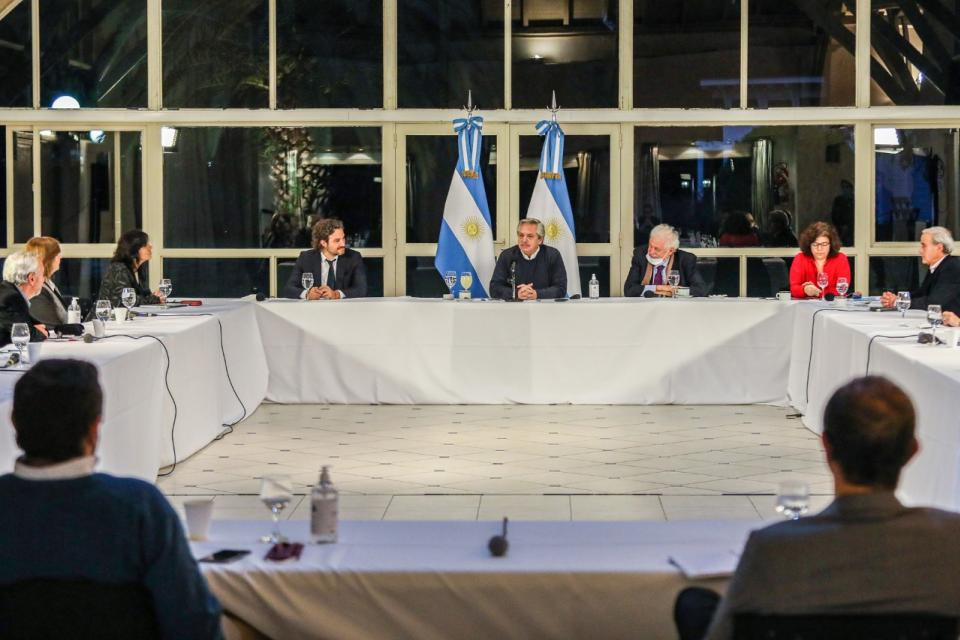

In [53]:
Image(img_req.content)

In [0]:
def get_date(s_new):
  date = s_new.find('span', attrs={'pubdate':'pubdate'})
  if date:
    return date.get('datetime')
  else:
    return None

def get_title(s_new):
  title = s_new.find('h1', attrs={'class':'article-title'})
  if title:
    return title.text
  else:
    return None

def get_volanta(s_new):
  volanta = s_new.find('h2', attrs={'class':'article-prefix'})
  if volanta:
    return volanta.get_text()
  else:
    return None

def get_img(s_new):
  media = s_new.find('div', attrs={'class':'article-main-media-image'})
  if media:
    images = media.find_all('img')
    if len(images) > 0:
      img = images[-1]
      img_src = img.get('data-src')
      try:
        img_req = requests.get(img_src)
        if img_req.status_code == 200:
          return img_req.content
        else:
          return None
      except:
        print('Cant get the image')
    else:
      print('Images not found')
  else:
    print('Media not found')

def get_body(s_new):
  body = s_new.find('div', attrs={'class':'article-text'})
  if body:
    return body.text
  else:
    return None


In [0]:
def get_info(s_new):
  # Dic with the info
  new_dict = {}

  # Get Date
  new_dict['date'] = get_date(s_new)
  
  # Get Title
  new_dict['title'] = get_title(s_new)

  # Get Volanta

  new_dict['volanta'] = get_volanta(s_new)

  # Get img
  new_dict['img'] = get_img(s_new)

  # Get body
  new_dict['body'] =  get_body(s_new)

  return new_dict
  

In [0]:
def scrape_new(url):
  try:
    new = requests.get(url)
    if new.status_code == 200:
      s_new = BeautifulSoup(new.text, 'lxml')
      ret_dict = get_info(s_new)
      ret_dict['url'] = url
      return ret_dict
    else:
      print(f'Error obteniendo la noticia {url}')
      print(f'Status code: {new.status_code}')
      return None
  except Exception as e :
    print('Error scrapeando la URL', url)
    print(e)
    return None

In [57]:
new_url

'https://www.pagina12.com.ar/267533-alberto-fernandez-recibe-a-los-especialistas-y-define-como-s'

In [58]:
scrape_new(new_url)

{'body': 'Tal como lo hizo antes de anunciar el aislamiento social preventivo y sus sucesivas prórrogas,, el presidente Alberto Fernández se reunirá esta tarde en la Quinta de Olivos con el comité de médicos\xa0que asesora al Gobierno en el manejo de la pandemia de la pandemi de coronavirus. Será como en anteriores ocasiones, uno de sus últimos pasos para definir los detalles del anuncio que hará este sábado sobre la próxima fase de la cuarententa, que tendrá marcadas diferencias entre el Área Metropolitana de Buenos Aires (AMBA), donde los casos de covid-19 están en franco ascenso, y el resto del país."El Presidente recibirá hoy a los expertos para tomar la decisión final", señaló la secretaria de Acceso a la Salud, Carla Vizzotti. El jefe de Estado llegará al encuentro luego de su viaje a Tucumán donde estuvo con el gobernador de la provincia, Juan Manzur.\xa0La reunión fue pautada para las 15En los últimos días, la situación en las villas,\xa0donde los casos crecen más que en otros 

In [59]:
links_sections

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/universidad-diario',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/contratapa']

In [0]:
news = []
for link in links_sections:
  try:
    r = requests.get(link)
    if r.status_code == 200:
      soup = BeautifulSoup(r.text, 'lxml')
      news.extend(get_urls_notes(soup))
    else:
      print('No se pudo comunicar con el sitio web', link)
  except Exception as e:
    print('No se pudo obtener la sesión', link)
    print(e)



In [62]:
news

['https://www.pagina12.com.ar/267533-alberto-fernandez-recibe-a-los-especialistas-y-define-como-s',
 'https://www.pagina12.com.ar/267521-las-claves-del-nuevo-certificado-de-circulacion',
 'https://www.pagina12.com.ar/267500-coronavirus-en-la-ciudad-de-buenos-aires-descartan-flexibili',
 'https://www.pagina12.com.ar/267496-otro-estilo-de-fake-news-la-nacion-y-los-cuadernillos-escola',
 'https://www.pagina12.com.ar/267447-el-policia-levanto-el-arma-y-le-apunto-a-mi-hermano',
 'https://www.pagina12.com.ar/267415-anses-alerta-por-estafas-con-el-ingreso-familiar-de-emergenc',
 'https://www.pagina12.com.ar/267446-integrantes-de-la-garganta-poderosa-se-reuniran-con-rodrigue',
 'https://www.pagina12.com.ar/267365-alberto-fernandez-afirmo-que-trabajara-para-poner-rapidament',
 'https://www.pagina12.com.ar/267376-fondo-contra-la-violencia',
 'https://www.pagina12.com.ar/267448-las-realidades-son-distintas',
 'https://www.pagina12.com.ar/267378-conferencia-regional',
 'https://www.pagina12.com.ar

In [66]:
data = []
size = len(news)-1
for i, new in enumerate(news):
  print(f'Scrapeando noticia {i}/{size}')
  data.append(scrape_new(new))

Scrapeando noticia 0/104
Scrapeando noticia 1/104
Scrapeando noticia 2/104
Scrapeando noticia 3/104
Scrapeando noticia 4/104
Scrapeando noticia 5/104
Scrapeando noticia 6/104
Scrapeando noticia 7/104
Scrapeando noticia 8/104
Scrapeando noticia 9/104
Media not found
Scrapeando noticia 10/104
Scrapeando noticia 11/104
Scrapeando noticia 12/104
Scrapeando noticia 13/104
Scrapeando noticia 14/104
Scrapeando noticia 15/104
Scrapeando noticia 16/104
Scrapeando noticia 17/104
Scrapeando noticia 18/104
Scrapeando noticia 19/104
Scrapeando noticia 20/104
Scrapeando noticia 21/104
Scrapeando noticia 22/104
Scrapeando noticia 23/104
Scrapeando noticia 24/104
Scrapeando noticia 25/104
Scrapeando noticia 26/104
Scrapeando noticia 27/104
Scrapeando noticia 28/104
Scrapeando noticia 29/104
Scrapeando noticia 30/104
Scrapeando noticia 31/104
Scrapeando noticia 32/104
Scrapeando noticia 33/104
Scrapeando noticia 34/104
Scrapeando noticia 35/104
Scrapeando noticia 36/104
Scrapeando noticia 37/104
Scrape

In [0]:
import pandas as pd

In [71]:
df = pd.DataFrame(data)
df.head()

,date,title,volanta,img,body,url
0,2020-05-22,Alberto Fernández recibe a los especialistas y...,El Presidente hará el anuncio este sábado,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,Tal como lo hizo antes de anunciar el aislamie...,https://www.pagina12.com.ar/267533-alberto-fer...
1,2020-05-22,Las claves del nuevo certificado de circulación,"Ajustan los tiempos de caducidad, inclusive de...",b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"El ministro de Transporte, Mario Meoni, confir...",https://www.pagina12.com.ar/267521-las-claves-...
2,2020-05-22,Coronavirus: en la Ciudad de Buenos Aires desc...,"""No debemos progresar con medidas de apertura""...",b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"El ministro de Salud porteño, Fernán Quirós, a...",https://www.pagina12.com.ar/267500-coronavirus...
3,2020-05-22,Otro estilo de fake news: La Nación y los cuad...,Una apelación al prejuicio,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,“Los riesgos de compartir noticias falsas en e...,https://www.pagina12.com.ar/267496-otro-estilo...
4,2020-05-22,"""El policía levantó el arma y le apuntó a mi h...","Habla el hermano de Luis Armando Espinoza, des...",b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,"""Pido que me ayuden a encontrarlo, mi mamá est...",https://www.pagina12.com.ar/267447-el-policia-...


In [0]:
df.to_csv('Noticias_Pagina12.csv')